## Dataset


In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-04 10:54:47--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: 'car_fuel_efficiency.csv'

     0K .......... .......... .......... .......... ..........  5%  618K 1s
    50K .......... .......... .......... .......... .......... 11%  974K 1s
   100K .......... .......... .......... .......... .......... 17% 2,61M 1s
   150K .......... .......... .......... .......... .......... 23% 4,30M 1s
   200K .......... .......... .......... .......... .......... 29% 1,13M 0s
   250K .......... .......... .......... .......... .......... 35% 5,69M 0s
   300K .......... .......... .......... .......... .......... 40% 6,95M 0s
   350K .

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv("car_fuel_efficiency.csv")
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


## Preparing the dataset

In [33]:
# Fill missing values with zeros.

#df.fillna(0, inplace=True)
#df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,0.0,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,0.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,0.0,15.101802
9700,180,0.0,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,0.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [76]:
# cleaning:
#df[df.num_doors <0].num_doors.count()
# df.num_doors = df.num_doors.abs()
df.loc[df['num_doors'] < 0, 'num_doors'] = 0

In [77]:
categorical_columns = ['origin','fuel_type','drivetrain']
# categorical_columns = ['origin','fuel_type','drivetrain','num_doors']
numerical_columns = ['engine_displacement','num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'fuel_efficiency_mpg','num_doors']
# numerical_columns = ['engine_displacement','num_cylinders', 'horsepower', 'vehicle_weight',
       # 'acceleration', 'model_year', 'fuel_efficiency_mpg']

df[categorical_columns]= df[categorical_columns].fillna('NA')
df[numerical_columns] = df[numerical_columns].fillna(0)
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,0.0,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,0.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,0.0,15.101802
9700,180,0.0,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,0.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [78]:
# Do train/validation/test split with 60%/20%/20% distribution.
# Use the train_test_split function and set the random_state parameter to 1.

from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
len(df_train), len(df_val), len(df_test)

(5822, 1941, 1941)

In [79]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# Remove target variable from the dataframes and feature list
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
numerical_columns.remove('fuel_efficiency_mpg')


# Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)



# Question 1


In [84]:
# Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.
# Train a model with max_depth=1.
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import export_text

model = DecisionTreeRegressor(max_depth=1, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse


1.610463902882759

In [85]:
# Get feature importances
feature_importances = model.feature_importances_
feature_names = dv.get_feature_names_out()

# Create a series to display feature importances
importances = pd.Series(feature_importances, index=feature_names)

# Sort features by importance
print(importances.sort_values(ascending=False).head(10))


vehicle_weight                  1.0
acceleration                    0.0
drivetrain=Front-wheel drive    0.0
engine_displacement             0.0
fuel_type=Diesel                0.0
drivetrain=All-wheel drive      0.0
fuel_type=Gasoline              0.0
horsepower                      0.0
num_cylinders                   0.0
model_year                      0.0
dtype: float64


# Question 2

Train a random forest regressor with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on the validation data?

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse

0.45893285500106257

# Question 3

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

In [99]:
scores = []
for n in np.arange(10,201,10):
    model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    scores.append({"n":n,"rmse":rmse})

In [95]:
import seaborn as sns

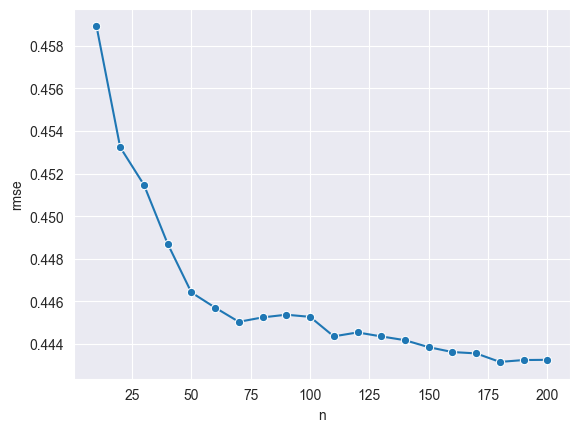

In [100]:
scoresDf = pd.DataFrame(scores)
sns.lineplot(data=scoresDf, x='n', y='rmse', marker='o')
# scoresDf.rmse.plot()
plt.show()

In [101]:
200

200

# Question 4

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
  - try different values of n_estimators from 10 till 200 (with step 10)
  - calculate the mean RMSE
- Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

In [105]:
scores = []
max_depth = [10, 15, 20, 25]
for d in max_depth:
    for n in np.arange(10,201,10):
        model = RandomForestRegressor(max_depth = d, n_estimators=n, random_state=1, n_jobs=-1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        scores.append({"maxdepth": d, "n":n,"rmse":rmse})
scoresDf = pd.DataFrame(scores)


<Axes: xlabel='n', ylabel='rmse'>

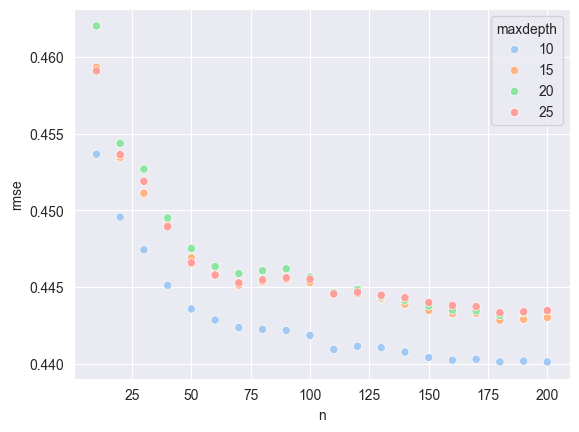

In [116]:
sns.scatterplot(data=scoresDf, hue='maxdepth', x='n', y='rmse', palette='pastel')

# Question 5

- Train the model with these parameters:
  - n_estimators=10,
  - max_depth=20,
  - random_state=1,
  - n_jobs=-1 (optional)
- Get the feature importance information from this model

In [148]:
rforest = RandomForestRegressor(max_depth=20, n_estimators=10, random_state=1, n_jobs=-1)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_val)
root_mean_squared_error(y_val, y_pred)

0.4620350534163503

In [149]:
RF_importances = rforest.feature_importances_
RF_feature_names =  dv.get_feature_names_out()

rf_importances = sorted(zip(RF_importances, RF_feature_names),reverse=True)

rf_importances

[(np.float64(0.9592601631123947), 'vehicle_weight'),
 (np.float64(0.016165337657302364), 'horsepower'),
 (np.float64(0.011576886311082732), 'acceleration'),
 (np.float64(0.003373623992590467), 'engine_displacement'),
 (np.float64(0.0033453853405923367), 'model_year'),
 (np.float64(0.0024491541900997743), 'num_cylinders'),
 (np.float64(0.0008404918269830736), 'num_doors'),
 (np.float64(0.0005513019518807461), 'origin=USA'),
 (np.float64(0.0005298104954147175), 'origin=Europe'),
 (np.float64(0.0004914904355942201), 'origin=Asia'),
 (np.float64(0.0003700110604826402), 'drivetrain=Front-wheel drive'),
 (np.float64(0.0003600088216292559), 'drivetrain=All-wheel drive'),
 (np.float64(0.00034603130048297054), 'fuel_type=Diesel'),
 (np.float64(0.00034030350347006536), 'fuel_type=Gasoline')]

# Question 6

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

`xgb_params = {

        'eta': 0.3,
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'reg:squarederror',
        'nthread': 8,

        'seed': 1,
        'verbosity': 1,

}`

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

In [150]:
!pip install xgboost

  Using cached xgboost-3.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.1-py3-none-win_amd64.whl (72.0 MB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [151]:
import xgboost as xgb

In [154]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [157]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
boost = xgb.train(xgb_params, dtrain, num_boost_round=100)
y_pred = boost.predict(dval)

root_mean_squared_error(y_val, y_pred)

0.4482747429697095

In [167]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
boost = xgb.train(xgb_params, dtrain, num_boost_round=100)
y_pred = boost.predict(dval)

root_mean_squared_error(y_val, y_pred)

0.4259323064397815

In [168]:
scores = []
for mxd in np.arange(1, 21, 1):
    for eta_samoe in np.arange(0.03, 1, 0.03):
        for child in np.arange(0, 20, 1):
            xgb_params = {
                'eta': eta_samoe,
                'max_depth': mxd,
                'min_child_weight': child,
                'objective': 'reg:squarederror',
                'seed': 1,
                'verbosity': 0,
                'device': 'gpu',
            }
            boost = xgb.train(xgb_params, dtrain, num_boost_round=100)
            y_pred = boost.predict(dval)

            rmse = root_mean_squared_error(y_val, y_pred)
            scores.append({'rmse':rmse,'max_depth':mxd,'eta':eta_samoe, 'min_child_weight':child })
scores_df= pd.DataFrame(scores)
scores_df

KeyboardInterrupt: 

In [183]:
scores_df= pd.DataFrame(scores)
scores_df.sort_values(by='rmse', ascending=True,inplace=True)
scores_df.head(10)

,rmse,max_depth,eta,min_child_weight
2036,0.415567,4,0.09,16
1385,0.415570,3,0.12,5
1388,0.415591,3,0.12,8
1438,0.415605,3,0.18,18
1417,0.415631,3,0.15,17
1419,0.415725,3,0.15,19
1371,0.415764,3,0.09,11
1390,0.415766,3,0.12,10
1397,0.415766,3,0.12,17
2038,0.415793,4,0.09,18


<Axes: >

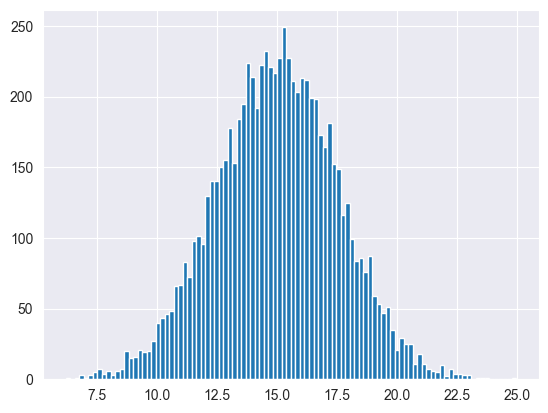

In [186]:
df_full_train['fuel_efficiency_mpg'].hist(bins=100)